# 02 Data exploration

In [1]:
%matplotlib inline

import os
import glob
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [2]:
# Some global variables
img_basepath = '/data/ml_course/04_Applied_Machine_Learning_2/11_Course_project/Swissroads_imgs/'
features_basepath = '/data/ml_course/04_Applied_Machine_Learning_2/11_Course_project/'
names = ['bike', 'car', 'motorcycle', 'other', 'truck', 'van']

## Plot images

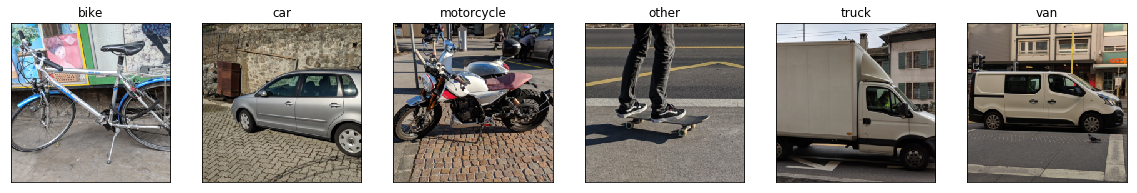

In [3]:
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(20, 4))
for i, name in enumerate(names):
    img_list = glob.glob(os.path.join(img_basepath+'train/'+name, '*.png'))
    img = Image.open(np.random.choice(img_list))
    axes[i].imshow(img)
    axes[i].set_title(name)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.show()

## Scree plot

In [4]:
# Load training data
with np.load(os.path.join(features_basepath, 'Swissroads_train.npz'), allow_pickle=False) as npz_file:
    data_tr = dict(npz_file.items())
    
X = data_tr['data']
y = np.where(data_tr['labels'] == 1)[1]
names = data_tr['names']

In [5]:
# Create PCA transformer
pca = PCA(n_components=None)

# Apply PCA to data
pca.fit(X)

# Proportion of variance explained
pve = pca.explained_variance_ratio_

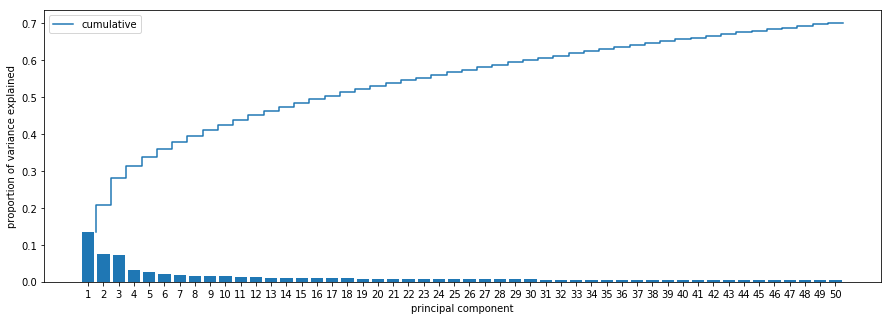

In [6]:
n_components_plot = 50

plt.figure(figsize=(15,5))

# Create bar plot
xcor = np.arange(1, len(pve) + 1) # 1,2,..,n_components
plt.bar(xcor[:n_components_plot], pve[:n_components_plot])
plt.xticks(xcor[:n_components_plot])

# Add cumulative sum
pve_cumsum = np.cumsum(pve)
plt.step(
    xcor[:n_components_plot]+0.5, # 1.5,2.5,..,n_components+0.5
    pve_cumsum[:n_components_plot], # Cumulative sum
    label='cumulative'
)

# Add labels
plt.xlabel('principal component')
plt.ylabel('proportion of variance explained')
plt.legend()
plt.show()

In [7]:
percentage_var = np.linspace(0.1, 1., 10)
for pc in np.linspace(0.1, 1., 10):
    ind = np.where(pve_cumsum >=pc)[0][0]
    print('PCA component number for more than {:.0f}% of variance explained: {}'.format(pc*100, ind+1))
    print('     Percentage of variance explained: {:.1f}'.format(pve_cumsum[ind]*100))               

PCA component number for more than 10% of variance explained: 1
     Percentage of variance explained: 13.4
PCA component number for more than 20% of variance explained: 2
     Percentage of variance explained: 20.9
PCA component number for more than 30% of variance explained: 4
     Percentage of variance explained: 31.2
PCA component number for more than 40% of variance explained: 9
     Percentage of variance explained: 41.0
PCA component number for more than 50% of variance explained: 17
     Percentage of variance explained: 50.4
PCA component number for more than 60% of variance explained: 30
     Percentage of variance explained: 60.0
PCA component number for more than 70% of variance explained: 50
     Percentage of variance explained: 70.1
PCA component number for more than 80% of variance explained: 81
     Percentage of variance explained: 80.1
PCA component number for more than 90% of variance explained: 135
     Percentage of variance explained: 90.1
PCA component number f

## 2D plot of PCA

In [8]:
X_PCA_2D = pca.transform(X)[:, :2]
X_PCA_2D.shape

(280, 2)

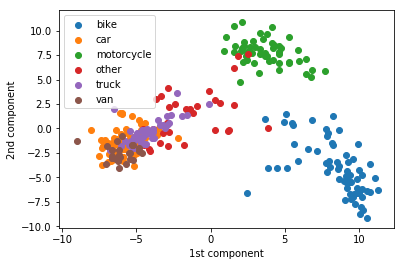

In [9]:
# Plot each kind of wine
for kind in np.arange(6):
    # Wine samples of this type
    idx = (y == kind)

    # Plot their components
    plt.scatter(
        X_PCA_2D[idx, 0], X_PCA_2D[idx, 1],
        label=names[kind]
    )

# Labels and legend
plt.legend()
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

Bikes and motorcycles are clearly separable while cars, trucks and vans are more difficult to separate with just two components. Other vehicles are in an area of transition between car/trucks/vans and the other type of vehicles